Data Overview:
                                               title  \
0                               IMPOSSIBLE CREATURES   
1  THE MILLICENT QUIBB SCHOOL OF ETIQUETTE FOR YO...   
2                            THE LAST DRAGON ON MARS   
3                               THE BLETCHLEY RIDDLE   
4              THE COMPLETE COOKBOOK FOR YOUNG CHEFS   

                            author         isbn13  nyt_rank  \
0               Katherine Rundell.  9780593809860         1   
1                    Kate McKinnon  9780316554732         2   
2                   Scott Reintgen  9781665946513         3   
3  Ruta Sepetys and Steve Sheinkin  9780593527542         4   
4      America's Test Kitchen Kids  9781492670025         5   

   nyt_rank_last_week  weeks_on_list                          category  \
0                   1              9  Childrens-Middle-Grade-Hardcover   
1                   3              6  Childrens-Middle-Grade-Hardcover   
2                   6              6  Childrens

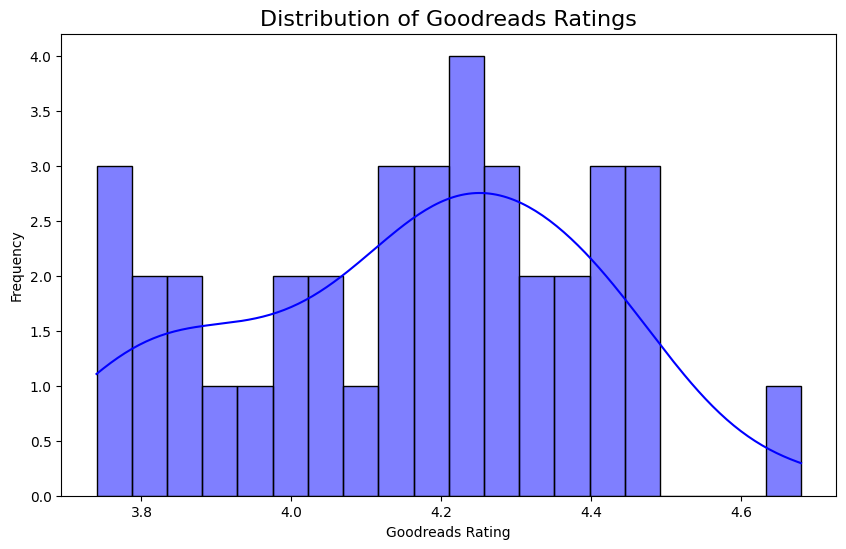

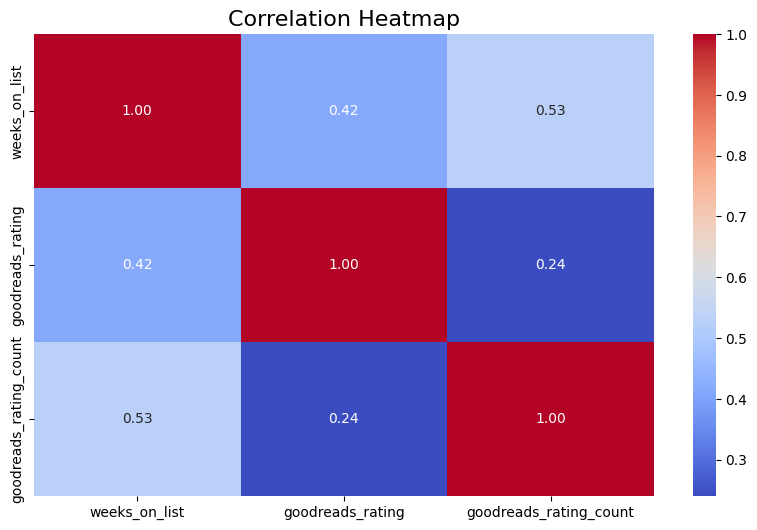

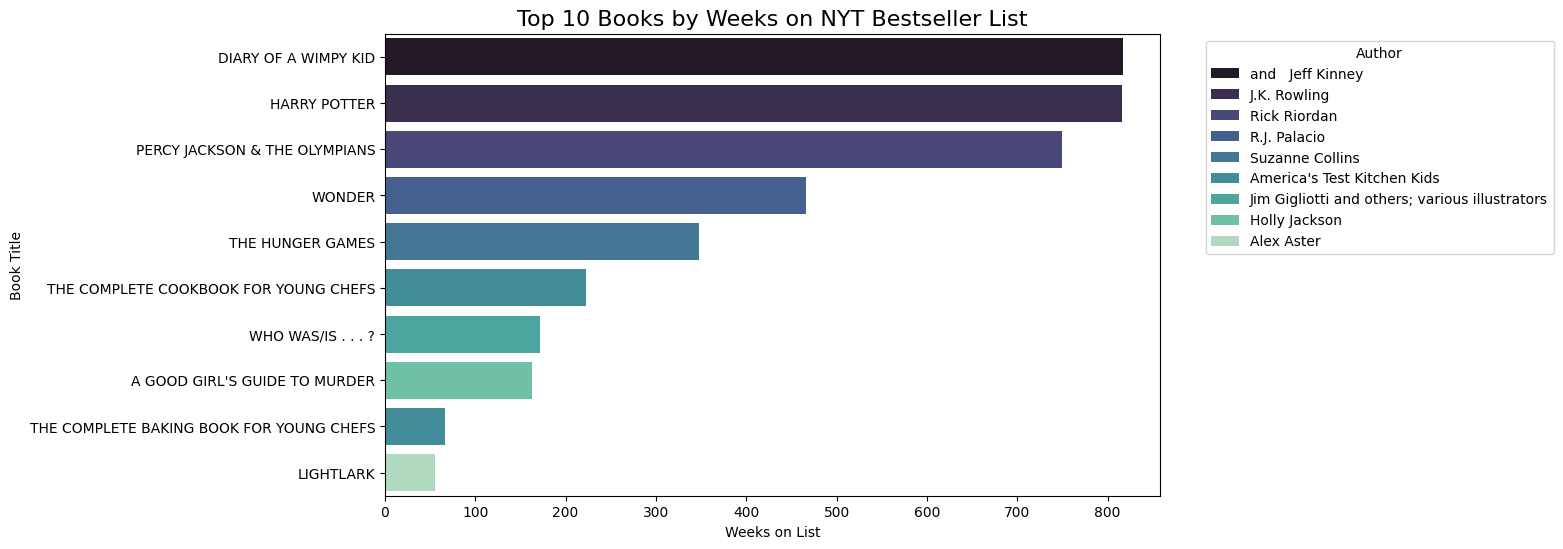


Top books by weeks on list saved to 'top_books_weeks.csv'.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the transformed data
file_path = 'transformed_books_data_20241119.csv'  # Replace transformed data file path
df = pd.read_csv(file_path)

# Display the first few rows of the data
print("Data Overview:")
print(df.head())

# Ensure columns are in the correct format
correlation_columns = ['weeks_on_list', 'goodreads_rating', 'goodreads_rating_count']
for col in correlation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# Check data info
print("\nData Info:")
print(df.info())

# ------------- BI Analysis -------------

# 1. Distribution of Goodreads Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['goodreads_rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Goodreads Ratings", fontsize=16)
plt.xlabel("Goodreads Rating")
plt.ylabel("Frequency")
plt.show()

# 2. Correlation Heatmap for RelevantColumns
plt.figure(figsize=(10, 6))
correlation = df[correlation_columns].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# 3. Books with the Most Weeks on NYT Bestseller List
top_books_weeks = df[['title', 'author', 'weeks_on_list']].sort_values(by='weeks_on_list', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='weeks_on_list', y='title', data=top_books_weeks, palette="mako", hue='author', dodge=False
)
plt.title("Top 10 Books by Weeks on NYT Bestseller List", fontsize=16)
plt.xlabel("Weeks on List")
plt.ylabel("Book Title")
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Save top books by weeks on list to CSV
top_books_weeks.to_csv('top_books_weeks.csv', index=False)
print("\nTop books by weeks on list saved to 'top_books_weeks.csv'.")